In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [231]:
car_price = pd.read_excel('saartot.xlsx',header = None)

In [232]:
car_price = car_price.iloc[:,0:-1]

In [233]:
car_price.columns = ['Date', 'Price', 'Change', 'Percent Change']
car_price['Date']=car_price['Date'].astype(str)

In [234]:
car_price = car_price.loc[[i for i in range(248) if not car_price.loc[i,'Date'][0]!= '2'], :]

In [235]:
car_price.head()

,Date,Price,Change,Percent Change
0,2019-02-28,16.56,-0.04,-0.0024
1,2019-01-31,16.60,-0.90,-0.0514
3,2018-12-31,17.50,0.10,0.0057
4,2018-11-30,17.40,-0.10,-0.0057
5,2018-10-31,17.50,0.10,0.0057


In [236]:
feature_df = pd.read_csv('car_data_clean.csv')

In [237]:
feature_df.head()

,Unnamed: 0,Date,Audi,BMW,Mercedes Benz,Mitsubishi Fuso,FCA,General Motors,Honda Group,Hyundai,...,Volkswagen,Volvo,Imported,Light Trucks,Domestic,Cars,Mini,Light Vehicles,Medium Duty Trucks,Hybrid/Electric/Fuel Cell Vehicles
0,9,Jan 2019,14253,18102,23721,0,136082,0,106139,42020,...,23074,5854,226484,468419,511241,252564,2457,135396,0,0
1,10,Dec 2018,22765,34357,36132,4,196520,0,155115,65721,...,32047,8826,336987,880440,938357,370718,2797,408603,6985,0
2,11,Nov 2018,17082,28330,32879,3,181310,0,120534,57499,...,26789,8181,290784,742197,802277,328741,3528,370345,6056,0
3,12,Oct 2018,16056,23262,31719,4,177391,0,122182,53025,...,29000,7327,276661,713369,794920,339215,3166,361991,6628,0
4,13,Sep 2018,19319,25908,30617,3,199819,0,132668,57359,...,30555,8715,302174,782222,854461,351203,3461,389503,6491,0


In [238]:
car_price.index = np.arange(230)

In [239]:
feature_df.columns

Index(['Unnamed: 0', 'Date', 'Audi', 'BMW', 'Mercedes Benz', 'Mitsubishi Fuso',
       'FCA', 'General Motors', 'Honda Group', 'Hyundai', 'Isuzu',
       'Jaguar Land Rover', 'Kia', 'Mazda', 'Mitsubishi', 'Nissan', 'Porsche',
       'Subaru', 'Tesla', 'Toyota Group', 'Volkswagen', 'Volvo', 'Imported',
       'Light Trucks', 'Domestic', 'Cars', 'Mini', 'Light Vehicles',
       'Medium Duty Trucks', 'Hybrid/Electric/Fuel Cell Vehicles'],
      dtype='object')

In [240]:
full_df = car_price.iloc[0:-1,:].join(feature_df,how='right',lsuffix='_dep', rsuffix='_indep')
full_df = full_df.drop(columns = 'Unnamed: 0')

In [241]:
full_df.columns

Index(['Date_dep', 'Price', 'Change', 'Percent Change', 'Date_indep', 'Audi',
       'BMW', 'Mercedes Benz', 'Mitsubishi Fuso', 'FCA', 'General Motors',
       'Honda Group', 'Hyundai', 'Isuzu', 'Jaguar Land Rover', 'Kia', 'Mazda',
       'Mitsubishi', 'Nissan', 'Porsche', 'Subaru', 'Tesla', 'Toyota Group',
       'Volkswagen', 'Volvo', 'Imported', 'Light Trucks', 'Domestic', 'Cars',
       'Mini', 'Light Vehicles', 'Medium Duty Trucks',
       'Hybrid/Electric/Fuel Cell Vehicles'],
      dtype='object')

In [242]:
full_df['Percent Change'] = full_df['Percent Change'].apply(lambda x: 0 if x<0 else 1)

In [225]:
full_df.columns

Index(['Date_dep', 'Price', 'Change', 'Percent Change', 'Date_indep', 'Audi',
       'BMW', 'Mercedes Benz', 'Mitsubishi Fuso', 'FCA', 'General Motors',
       'Honda Group', 'Hyundai', 'Isuzu', 'Jaguar Land Rover', 'Kia', 'Mazda',
       'Mitsubishi', 'Nissan', 'Porsche', 'Subaru', 'Tesla', 'Toyota Group',
       'Volkswagen', 'Volvo', 'Imported', 'Light Trucks', 'Domestic', 'Cars',
       'Mini', 'Light Vehicles', 'Medium Duty Trucks',
       'Hybrid/Electric/Fuel Cell Vehicles'],
      dtype='object')

-1.0408340855860843e-17

In [243]:
pca = PCA(n_components=7, svd_solver='arpack')
pca.fit(X)
print(sum(pca.explained_variance_ratio_))
pca.components_


0.99641803567476


array([[ 3.03970640e-03,  7.48527556e-03,  5.34293438e-03,
         5.78392338e-06,  5.28475399e-02,  2.78014607e-01,
         4.38814966e-02,  7.41615986e-03,  3.77359983e-03,
         2.10223088e-03,  4.13094028e-03,  9.19785389e-03,
         1.42779331e-02,  2.93464158e-02,  3.65164350e-05,
         7.84300922e-03, -5.90774421e-04,  6.25809856e-02,
         9.98627164e-03,  5.91294763e-03,  8.55493636e-02,
         4.66046043e-01,  7.00525340e-01,  3.17929994e-01,
        -1.25935687e-03,  3.09656000e-01,  1.79711033e-03,
         1.78267165e-02],
       [ 3.16632060e-02,  2.36492568e-02,  3.71886424e-02,
         3.23880615e-05,  5.29850473e-01, -4.66708067e-01,
         7.94319666e-02,  7.59346041e-02, -9.62922619e-03,
         2.62498695e-02,  8.18308632e-02,  8.97766187e-03,
        -2.78397499e-02,  1.54067660e-01,  9.58180236e-03,
         1.06092496e-01,  1.68528880e-02,  1.32788659e-01,
         1.02037692e-02, -5.83629156e-03,  2.08047916e-01,
         4.91414783e-01, -2.63

In [244]:
from patsy import dmatrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

scalar = StandardScaler()
scalar.fit(X)

log = LogisticRegression()

y = full_df['Percent Change']
X = full_df[full_df.columns[5::]]
#gbm = xgb.XGBRegressor(objective = 'reg:linear',gamma = 0, n_estimators = 1000)
gbm = xgb.XGBClassifier(objective = 'binary:logistic',gamma = 10, max_depth = 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
#y_test_sorted = y_test.sort_index()
#X_test_sorted = X_test.sort_index()
#X_test_sorted = scalar.transform(X_test_sorted)

/Users/royluo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/royluo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/Users/royluo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


In [247]:
# gbm.fit(X_train,y_train)
# y_predict = gbm.predict(X_test)
# accuracy_score(y_predict, y_test)

log.fit(X_train,y_train)
y_predict = log.predict(X_test)
accuracy_score(y_predict, y_test)

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(y_test, y_predict)
# fpr, tpr, thresholds = roc_curve(y_test, log.predict_proba(X_test))
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# print (logit_roc_auc)

/Users/royluo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.41304347826086957

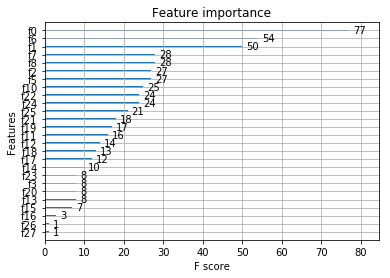

In [161]:
xgb.plot_importance(gbm)

In [162]:
#gbm.feature_importances_
#y_test_sorted = y_test.sort_index()
#X_test_sorted = X_test.sort_index()
#X_train_new = X_train[['Audi','Honda Group','BMW','Hyundai','Isuzu','Mercedes Benz','General Motors']]
#X_test_new = X_test_sorted[['Audi','Honda Group','BMW','Hyundai','Isuzu','Mercedes Benz','General Motors']]

In [148]:
# gbm_new = xgb.XGBRegressor(objective = 'reg:linear')
# gbm_new.fit(X_train_new,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [149]:
# gbm_full = xgb.XGBRegressor(objective = 'reg:linear')
# gbm_full.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

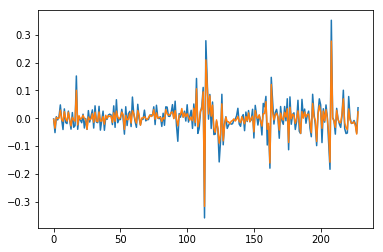

In [151]:
# plt.plot(y)
# plt.plot(gbm_full.predict(X))

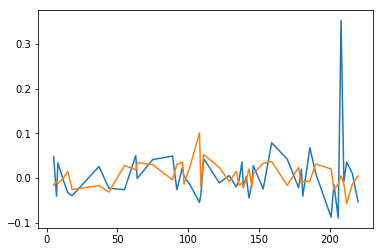

In [172]:
# plt.plot(y_test_sorted)
# plt.plot(y_test_sorted.index,gbm.predict(X_test_sorted))

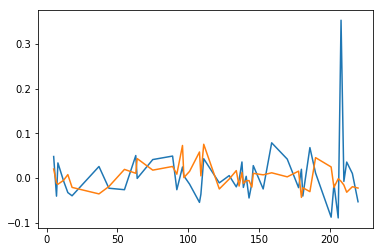

In [143]:
# plt.plot(y_test_sorted.index,y_test_sorted)
# plt.plot(X_test_new.index,gbm_new.predict(X_test_new))